# Linear models

Linear models are the simplest form of models that we can build. In spite of their simplicity, in practice they often do surprisingly well and are widely used. Remember from lesson 1 that machine learning problems are divided into regression and classification. We will spend most of this lesson discussing linear models for regression, where it is easier to show mathematically how they work.

Lesson outcomes:
1. Linear models for regression.
2. Ordinary least squares.
3. Regularisation - ridge and lasso.

### Linear models for regression

Suppose that we have a single predictor $x$ for a reasonse $y$ which takes continuous values. The linear model for $y$ on $x$ says that $$y = a + bx + \text{error},$$ for unknown "intercept" $a$, "coefficient" $b$, and some random error (usually assumed to be a normal distribution with mean zero and some standard deviation).

Examples:
1. How height is related to shoe size.
2. How the amount of merchandise sold depends on the amount spent on advertising.
3. How the amount of crops grown in a field depends on the amount of fertiliser used.

Linear models are rarely "right" in the real world. The model is just a tool for helping us make predictions. Our goal is to estimate the unknown $a$ and $b$. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

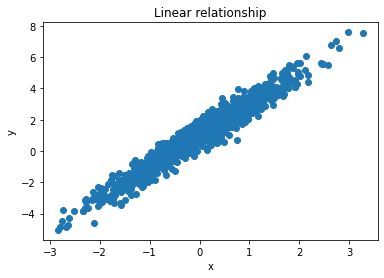

In [2]:
a = 1
b = 2

x = np.random.normal(size = 1000)
y = a + b*x + np.random.normal(scale = 0.5, size = len(x))

plt.scatter(x, y)
plt.title('Linear relationship')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Ordinary least squares

Ordinary least squares (OLS) is the number one most widely used algorithm for regression problems. It's the first thing you'll meet in any statistics or machine learning course at university. We begin by assuming that the linear relationship holds for each data point, so $$y_i = a + bx_i +\text{error}_i$$ for every $i = 1,\ldots, n$ (note that $a$ and $b$ do not depend on $i$). We will estimate $a$ and $b$ by minimising the sum of squares: $$(\hat a, \hat b) = \text{argmin}_{a,b} \sum_{i=1}^n (y_i - a - bx_i)^2.$$ We can solve this problem by finding the stationary points with respect to $a$ and $b$. For simplicity we may assume that $\sum_{i=1}^n x_i = 0$ (this is true if we standardise the variable $x$).

**Exercise:** Check for yourself that the solution is
$$ \hat a = \bar y; \quad \hat b = \frac{\sum_{i=1}^n x_i (y_i - \bar y)}{\sum_{i=1}^n x_i^2},$$
where we have defined the sample mean $\bar y := \frac{1}{n} \sum_{i = 1}^n y_i$.

In [3]:
# Estimate unknown parameters
print('Truth: a = ' + str(a) + ', b = ' + str(b))
a_est = np.mean(y)
b_est = sum(x * (y - a_est)) / sum(x * x)
print('Estimate: a = ' + str(a_est) + ', b = ' + str(b_est))

Truth: a = 1, b = 2
Estimate: a = 1.003427542659721, b = 2.000416441795471


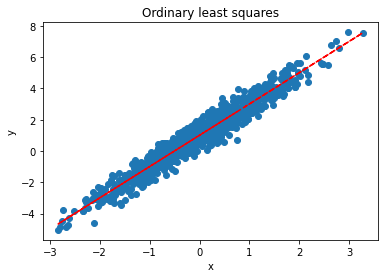

In [4]:
# Make predictions
pred = a_est + b_est * x

plt.scatter(x, y)
plt.plot(x, pred, '--', color='red')
plt.title('Ordinary least squares')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Multivariate case

Suppose that we now have multiple predictors $x_1$, $x_2$, \ldots, $x_p$. The linear model (with intercept) becomes: $$ y_i = a + b_1 x_{i1} + b_2 x_{i2} + \ldots + b_p x_{ip} + \text{error}_i, \text{ for } i = 1,\ldots n.$$

It is easier to write this using vectors and matrices:
$$ Y = X \beta + \varepsilon,$$ where 
$$ Y = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}; \quad X = \begin{bmatrix} 1 & x_{11} & x_{12} & \ldots & x_{1p}\\ 1 & x_{21} & x_{22} & \ldots & x_{2p}\\ \vdots & \vdots & \vdots & \ddots & \vdots \\ 1 & x_{n1} & x_{n2} & \ldots & x_{np}\\   \end{bmatrix}; \quad \beta = \begin{bmatrix} a \\ b_1 \\ b_2 \\ \vdots \\ b_p\end{bmatrix}; \quad \varepsilon = \begin{bmatrix} \text{error}_1 \\ \text{error}_2 \\ \vdots \\ \text{error}_n\end{bmatrix}. $$

Note that the first column of $X$ is all ones - this is a standard trick to account for the intercept term $a$ in the model. In machine learning we sometimes write $y$ instead of $Y$ --- don't worry about it.

**Exercises:**
1. Check for yourself that these two equations are identical.
2. Check that the sum of squares criteria becomes $(Y - X\beta)^T (Y - X\beta)$, where $^T$ is the vector transpose operator. We usually write this as $\| Y - X\beta \|^2$, where $\|x\| = \sqrt{x^T x}$ is called the Euclidean norm.
3. Show that the ordinary least squares solution is $$ \hat \beta = (X^T X)^{-1} X^T Y.$$ This is a very famous formula!

### Recap

The linear model is $$ Y = X \beta + \varepsilon,$$ and our goal is to estimate the unknown $\beta$. The ordinary least squares approach minimises the residual sum of squares $$\| Y - X\beta\|^2.$$ The solution is the OLS estimate $$ \hat \beta = (X^T X)^{-1} X^T Y.$$

# Regularisation

When there are lots of variables ($p$ is large compared to $n$), the ordinary least squares approach can produce an overly complicated solution and do poorly. In these cases we can use algorithms which seek simpler solutions. This is done by adding a penalty term (regularisation) to the loss function as follows:
$$ \hat \beta = \text{argmin}_\beta \; \|Y - X\beta\|^2 + J(\beta),$$
where we pick the function $J$ so that it takes larger values for "more complicated" choices $\beta$.

The two most common choices are:
1. "Ridge" penalty $J(\beta) = \lambda \|\beta\|^2 = \lambda \sum_{j=1}^p \beta_j^2$ for some choice of $\lambda > 0$.
2. "Lasso" penalty $J(\beta) = \lambda \sum_{j=1}^p |\beta_j|$ for some choice of $\lambda > 0$.
We will discuss ways to choose the regularisation parameter $\lambda$ later in the course.

Ridge regression is good when the variables in $X$ are correlated and is closely related to Principal Component Analysis (PCA), which is a common way of transforming a large set of variables $X$ into a smaller one that still contains most of the information in $X$. Lasso regression is good when only a few of the variables in $X$ are relevant, but we don't know which ones ("sparsity"). The lasso tends to lead to a solution where most of the coefficients $\hat\beta_j$ are zero.

**Bonus:** One can combine the ridge and lasso penalties into the "elastic net" penalty $J(\beta) = \lambda_1 \|\beta\|^2 + \lambda_2 \sum_{j=1}^p |\beta_j|$.

**Exercise:** Show that the ridge regression solution is $\hat \beta = (X^T X + \lambda I)^{-1} X^T Y$, where $I$ is the identity matrix.

# House prices

In [17]:
import pandas as pd

# Import data
df = pd.read_csv('../data/house.csv') # df = pd.read_csv('house.csv')
columns = ['LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageArea']
X = df[columns]
print('Does X have any missing values? ' + str(X.isna().any().any()))
X.corr() # correlations between the features

Does X have any missing values? False


,LotArea,OverallQual,OverallCond,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea
LotArea,1.000000,0.105806,-0.005636,0.299475,0.050986,0.126031,0.014259,0.119690,-0.017784,0.190015,0.180403
OverallQual,0.105806,1.000000,-0.091932,0.476224,0.295493,0.550600,0.273458,0.101676,-0.183882,0.427452,0.562022
OverallCond,-0.005636,-0.091932,1.000000,-0.144203,0.028942,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.151521
1stFlrSF,0.299475,0.476224,-0.144203,1.000000,-0.202646,0.380637,-0.119916,0.127401,0.068101,0.409516,0.489782
2ndFlrSF,0.050986,0.295493,0.028942,-0.202646,1.000000,0.421378,0.609707,0.502901,0.059306,0.616423,0.138347
FullBath,0.126031,0.550600,-0.194149,0.380637,0.421378,1.000000,0.136381,0.363252,0.133115,0.554784,0.405656
HalfBath,0.014259,0.273458,-0.060769,-0.119916,0.609707,0.136381,1.000000,0.226651,-0.068263,0.343415,0.163549
BedroomAbvGr,0.119690,0.101676,0.012980,0.127401,0.502901,0.363252,0.226651,1.000000,0.198597,0.676620,0.065253
KitchenAbvGr,-0.017784,-0.183882,-0.087001,0.068101,0.059306,0.133115,-0.068263,0.198597,1.000000,0.256045,-0.064433
TotRmsAbvGrd,0.190015,0.427452,-0.057583,0.409516,0.616423,0.554784,0.343415,0.676620,0.256045,1.000000,0.337822


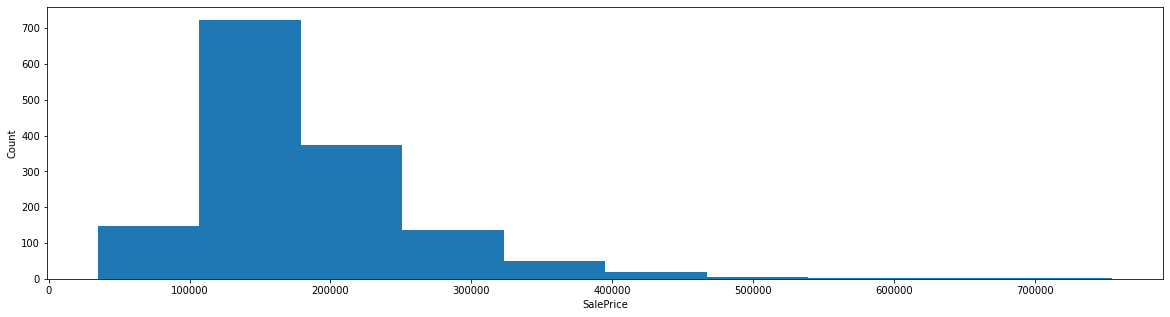

In [18]:
import matplotlib.pyplot as plt

plt.hist(df['SalePrice'])
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.show()

The values of $y$ are very heavy tailed. This will have the effect that our "score" when we evaluate our models will almost entirely depend on how well we estimate the largest-valued responses. This isn't what we want (we care about all data points equally) so regression problems are usually formulated so that the distribution of $y$ looks somewhat normal, or at least so that the responses have roughly the same scale. In this case, it makes sense for us to try to predict the log-price of the houses.

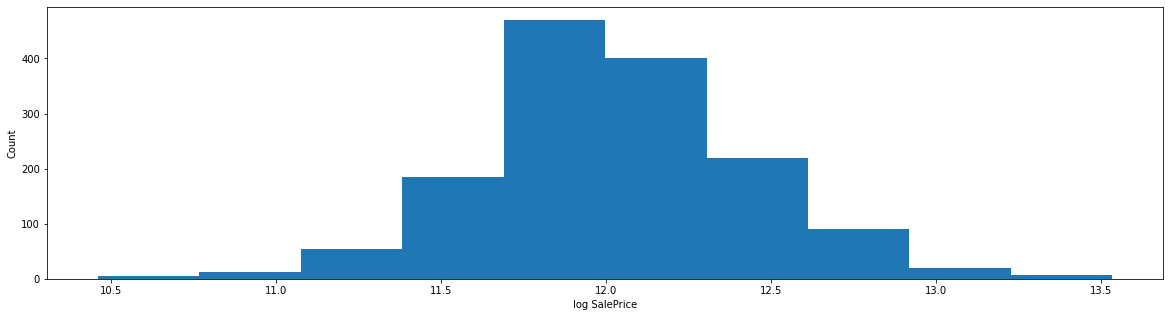

In [19]:
y = np.log(df['SalePrice'])
plt.hist(y)
plt.xlabel('log SalePrice')
plt.ylabel('Count')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # for standardising

# Train-test split and standardise
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
scaler.fit(X_train) # use only information in training set for standardising
X_train = pd.DataFrame(scaler.transform(X_train), columns = columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = columns)

### Ordinary least squares

Error = 0.042813791633739565


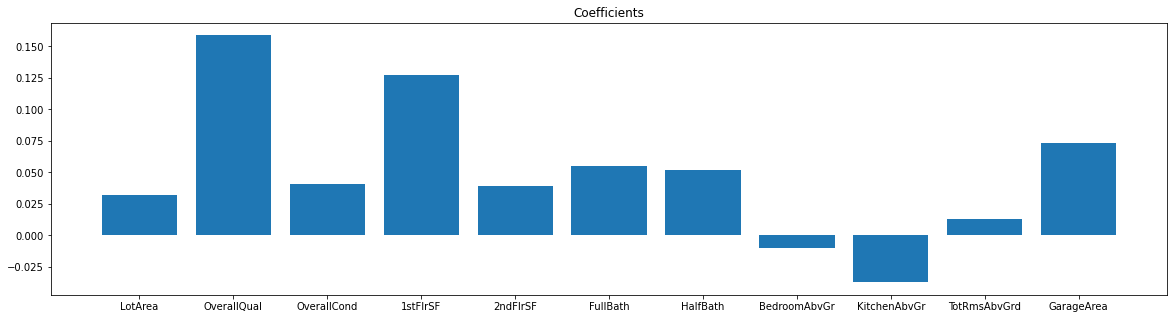

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error # for evaluating model performance

ols = LinearRegression()
ols.fit(X_train, y_train)
print('Error = ' + str(mean_squared_error(y_test, ols.predict(X_test))))
plt.rcParams['figure.figsize'] = [20, 5] # make plots bigger
plt.bar(X_train.columns, ols.coef_)
plt.title('Coefficients')
plt.show()

### Ridge regression

Error = 0.04278393502514294


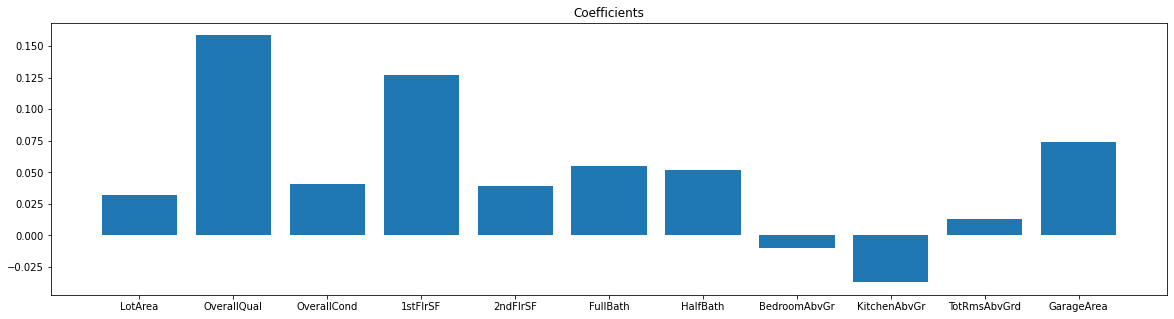

In [22]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 1) # the penalty parameter is called "alpha" in sklearn.
ridge.fit(X_train, y_train)
print('Error = ' + str(mean_squared_error(y_test, ridge.predict(X_test))))
plt.bar(X_train.columns, ridge.coef_)
plt.title('Coefficients')
plt.show()

### Lasso regression

Error = 0.046093741327613486


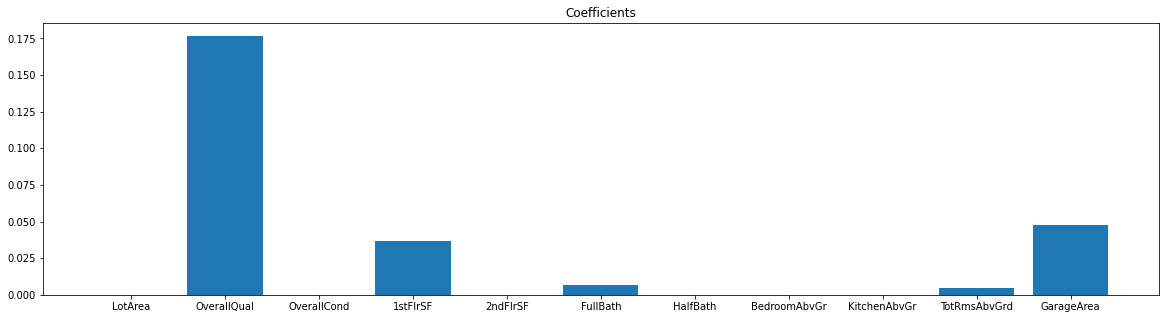

In [29]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)
print('Error = ' + str(mean_squared_error(y_test, lasso.predict(X_test))))
plt.bar(X_train.columns, lasso.coef_)
plt.title('Coefficients')
plt.show()

**Exercise:**
1. Change the value of the penalty term "alpha" in the ridge and lasso models. Can you improve the test scores?
2. Choose any 5 of the predictors and re-run this workbook. You can do this by modifying the line:
```columns = ['LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageArea']``` to --- for example --- ```columns = ['LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF']```.
3. (**Bonus**) What are the best 5 predictors you can find? You might find it helpful to look at the features with non-zero coefficients in the Lasso model.

# Bonus: linear models for classification

In this lesson we have discussed doing regression using a linear model. We can do something similar for classification, and the approach is called "logistic regression" (although "logistic classification" would make more sense). Consider the classification setting where we have a sincle predictor $x$ and the response $y$ equals 0 or 1 ("binary classification"). In this case the logistic regression model is:
$$ \log\bigg(\frac{\Pr(y = 1)}{\Pr(y=0)}\bigg) = a + bx.$$

We can fit the coefficients $a$ and $b$ by performing a similar minimisation procedure to OLS, but will a different loss function.


Logistic regression classifiers can be generalised to handle multiple variables $X$ and also to predict multiple label classes (so $y$ can take on a few values, not just zero and one). We will apply logistic regression to one of the most famous machine learning data sets of all time - the iris flower data used by Ronald Fisher in 1936.

In [12]:
# Load data
import pandas as pd

columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('../data/iris.data', header=None, names=columns) # df = pd.read_csv('iris.data', header=None, names=columns)
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Our goal is to predict the species of a flower ("class") out of three options, by using four measurements of different parts of the flower.

In [13]:
from sklearn.preprocessing import LabelEncoder # converting the species names into responses for machine learning

le = LabelEncoder()
le.fit(df['class'])
y = pd.Series(le.transform(df['class']))
X = df.drop(columns = ['class'])
print(y.value_counts())
X

0    50
1    50
2    50
Name: count, dtype: int64


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # for standardising

# Train-test split and standardise
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, stratify = y)
# the "stratify" option means we get equal proportions of the different flower species in the training and test sets
scaler = StandardScaler()
scaler.fit(X_train) # use only information in training set for standardising
X_train = pd.DataFrame(scaler.transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score # for evaluating model performance

log = LogisticRegression(penalty = None) # LogisticRegression uses a ridge penalty by default.
log.fit(X_train, y_train)
print('Accuracy = ' + str(accuracy_score(y_test, log.predict(X_test))))

Accuracy = 0.98


98% accuracy! This is very easy data to predict.